In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
co = pd.read_csv("./data/ad_viz_plotval_data_co.csv")
no2 = pd.read_csv("./data/ad_viz_plotval_data_no2.csv")
ozone = pd.read_csv("./data/ad_viz_plotval_data_ozone.csv")
pm2 = pd.read_csv("./data/ad_viz_plotval_data_pm2.csv")
so2 = pd.read_csv("./data/ad_viz_plotval_data_so2.csv")
covid_data = pd.read_csv("data/New_York_State_Statewide_COVID-19_Testing.csv")

In [3]:
# co.head()
# no2.head()
# ozone.head()
# pm2.head()
# so2.head()

In [4]:
co.columns
imp_co =co[['Date','Daily Max 8-hour CO Concentration' , 'DAILY_AQI_VALUE','Site Name','DAILY_OBS_COUNT', 'PERCENT_COMPLETE','CBSA_NAME', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'  ]]

In [5]:
imp_no2 = no2[['Date','Daily Max 1-hour NO2 Concentration' , 'DAILY_AQI_VALUE','Site Name','DAILY_OBS_COUNT', 'PERCENT_COMPLETE','CBSA_NAME', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'  ]]

In [6]:
imp_ozone = ozone[['Date','Daily Max 8-hour Ozone Concentration' , 'DAILY_AQI_VALUE','Site Name','DAILY_OBS_COUNT', 'PERCENT_COMPLETE','CBSA_NAME', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'  ]]

In [7]:
imp_pm2 = pm2[['Date','Daily Mean PM2.5 Concentration' , 'DAILY_AQI_VALUE','Site Name','DAILY_OBS_COUNT', 'PERCENT_COMPLETE','CBSA_NAME', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'  ]]

In [8]:
imp_so2 = so2[['Date','Daily Max 1-hour SO2 Concentration' , 'DAILY_AQI_VALUE','Site Name','DAILY_OBS_COUNT', 'PERCENT_COMPLETE','CBSA_NAME', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'  ]]

In [9]:
print(len(co), len(no2), len(ozone), len(pm2), len(so2))

2425 1801 9290 8580 4868


In [10]:
co_county=imp_co['COUNTY'].unique()
co_county

array(['Albany', 'Bronx', 'Erie', 'Monroe', 'New York', 'Queens',
       'Steuben'], dtype=object)

In [11]:
no2_county = imp_no2['COUNTY'].unique()
no2_county

array(['Bronx', 'Erie', 'Monroe', 'Queens'], dtype=object)

In [12]:
ozone_county =imp_ozone['COUNTY'].unique()
ozone_county

array(['Albany', 'Bronx', 'Chautauqua', 'Dutchess', 'Erie', 'Essex',
       'Hamilton', 'Herkimer', 'Jefferson', 'Monroe', 'New York',
       'Niagara', 'Onondaga', 'Orange', 'Oswego', 'Putnam', 'Queens',
       'Richmond', 'Rockland', 'Saratoga', 'Steuben', 'Suffolk',
       'Tompkins', 'Wayne', 'Westchester'], dtype=object)

In [13]:
pm2_county = imp_pm2 ['COUNTY'].unique()
pm2_county

array(['Albany', 'Bronx', 'Chautauqua', 'Erie', 'Essex', 'Kings',
       'Monroe', 'Nassau', 'New York', 'Oneida', 'Onondaga', 'Orange',
       'Queens', 'Richmond', 'Rockland', 'Steuben', 'Suffolk',
       'Westchester'], dtype=object)

In [14]:
so2_county = imp_so2 ['COUNTY'].unique()
so2_county

array(['Albany', 'Bronx', 'Chautauqua', 'Dutchess', 'Erie', 'Essex',
       'Hamilton', 'Monroe', 'Nassau', 'Onondaga', 'Putnam', 'Queens',
       'St. Lawrence', 'Steuben', 'Suffolk'], dtype=object)

In [15]:
covid_data_co= covid_data[covid_data['County'].isin(co_county) ]
covid_data_no2= covid_data[covid_data['County'].isin(no2_county) ]
covid_data_ozone= covid_data[covid_data['County'].isin(ozone_county) ]
covid_data_pm2= covid_data[covid_data['County'].isin(pm2_county) ]
covid_data_so2= covid_data[covid_data['County'].isin(so2_county ) ]


In [16]:
print("FOr co: ","co data len ", len(imp_co),"covid data len " ,len(covid_data_co))
print("FOr no2: ","no2 data len ", len(imp_no2),"covid data len " ,len(covid_data_no2))
print("FOr ozone: ","ozone data len ", len(imp_ozone),"covid data len " ,len(covid_data_ozone))
print("FOr pm2: ","pm2 data len ", len(imp_pm2),"covid data len " ,len(covid_data_pm2))
print("FOr so2: ","so2 data len ", len(imp_so2),"covid data len " ,len(covid_data_so2))

FOr co:  co data len  2425 covid data len  1946
FOr no2:  no2 data len  1801 covid data len  1112
FOr ozone:  ozone data len  9290 covid data len  6950
FOr pm2:  pm2 data len  8580 covid data len  5004
FOr so2:  so2 data len  4868 covid data len  4170


In [17]:
# covid_data_so2.rename(columns={'County':'COUNTY'}, inplace=True)
# covid_data_so2.rename(columns={'Test Date':'Date'}, inplace=True)
# covid_data_so2.columns


In [18]:
new_combined_so2=pd.merge(imp_so2, covid_data_so2, how='inner', left_on=['Date','COUNTY'] , right_on = ['Test Date','County'])

In [19]:
new_combined_so2.head()
len(new_combined_so2)

3807

In [20]:
new_combined_pm2=pd.merge(imp_pm2, covid_data_pm2, how='inner', left_on=['Date','COUNTY'] , right_on = ['Test Date','County'])
new_combined_pm2.head()
len(new_combined_pm2)

6576

In [21]:
new_combined_ozone=pd.merge(imp_ozone, covid_data_ozone, how='inner', left_on=['Date','COUNTY'] , right_on = ['Test Date','County'])
new_combined_ozone.head()
len(new_combined_ozone)

7716

In [22]:
new_combined_no2=pd.merge(imp_no2, covid_data_no2, how='inner', left_on=['Date','COUNTY'] , right_on = ['Test Date','County'])
new_combined_no2.head()
len(new_combined_no2)

1389

In [23]:
new_combined_co=pd.merge(imp_co, covid_data_co, how='inner', left_on=['Date','COUNTY'] , right_on = ['Test Date','County'])
new_combined_co.head()
len(new_combined_co)

1863

In [24]:
new_combined_co.head()

Date  Daily Max 8-hour CO Concentration  DAILY_AQI_VALUE  \
0  03/01/2020                                0.3                3   
1  03/02/2020                                0.4                5   
2  03/03/2020                                0.4                5   
3  03/04/2020                                0.3                3   
4  03/05/2020                                0.2                2   

         Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0  PFIZER LAB SITE               24             100.0   
1  PFIZER LAB SITE               24             100.0   
2  PFIZER LAB SITE               24             100.0   
3  PFIZER LAB SITE               24             100.0   
4  PFIZER LAB SITE               24             100.0   

                               CBSA_NAME COUNTY  SITE_LATITUDE  \
0  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
1  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
2  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
3  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
4  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   

   SITE_LONGITUDE   Test Date County  New Positives  \
0       -73.87809  03/01/2020  Bronx              0   
1       -73.87809  03/02/2020  Bronx              0   
2       -73.87809  03/03/2020  Bronx              0   
3       -73.87809  03/04/2020  Bronx              0   
4       -73.87809  03/05/2020  Bronx              0   

   Cumulative Number of Positives  Total Number of Tests Performed  \
0                               0                                0   
1                               0                                0   
2                               0                                1   
3                               0                                0   
4                               0                                5   

   Cumulative Number of Tests Performed  
0                                     0  
1                                     0  
2                                     1  
3                                     1  
4                                     6

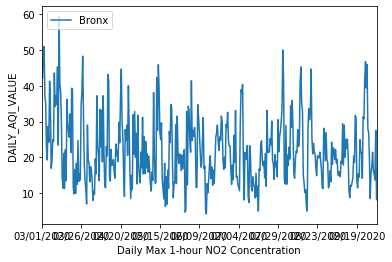

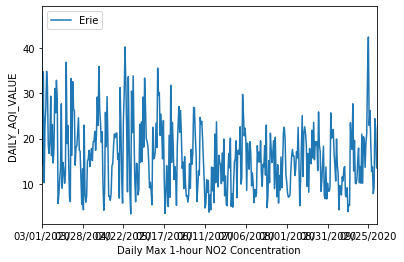

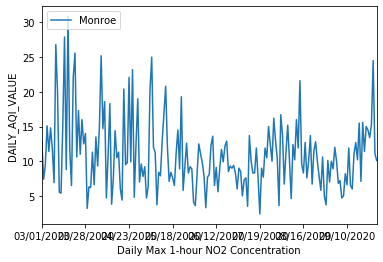

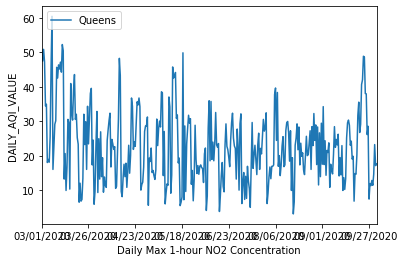

In [25]:
# do not write about this 
for c in no2_county:
    new_combined_no2.loc[new_combined_no2['County'] == c].plot(x='Date', y= 'Daily Max 1-hour NO2 Concentration', label = c)
    plt.xlabel('Daily Max 1-hour NO2 Concentration')
    plt.ylabel("DAILY_AQI_VALUE")
    plt.legend(loc="upper left")

In [26]:
new_combined_no2.head()

Date  Daily Max 1-hour NO2 Concentration  DAILY_AQI_VALUE  \
0  03/01/2020                                44.4               42   
1  03/01/2020                                42.2               40   
2  03/02/2020                                49.0               46   
3  03/02/2020                                51.0               48   
4  03/03/2020                                37.0               35   

         Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0            IS 52               24             100.0   
1  PFIZER LAB SITE               24             100.0   
2            IS 52               24             100.0   
3  PFIZER LAB SITE               20              83.0   
4            IS 52               21              88.0   

                               CBSA_NAME COUNTY  SITE_LATITUDE  \
0  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8160   
1  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
2  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8160   
3  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8679   
4  New York-Newark-Jersey City, NY-NJ-PA  Bronx        40.8160   

   SITE_LONGITUDE   Test Date County  New Positives  \
0       -73.90200  03/01/2020  Bronx              0   
1       -73.87809  03/01/2020  Bronx              0   
2       -73.90200  03/02/2020  Bronx              0   
3       -73.87809  03/02/2020  Bronx              0   
4       -73.90200  03/03/2020  Bronx              0   

   Cumulative Number of Positives  Total Number of Tests Performed  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                1   

   Cumulative Number of Tests Performed  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     1

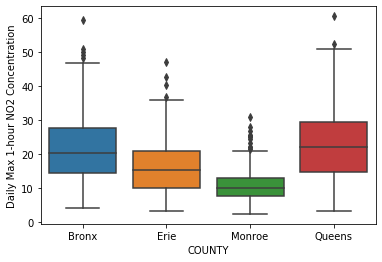

In [27]:
sns.boxplot(x="COUNTY", y="Daily Max 1-hour NO2 Concentration", data=new_combined_no2)

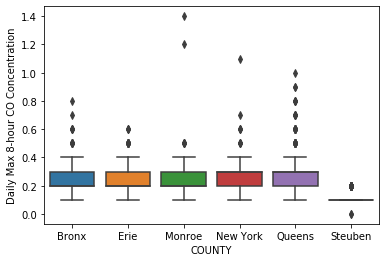

In [28]:
sns.boxplot(x="COUNTY", y="Daily Max 8-hour CO Concentration", data=new_combined_co)

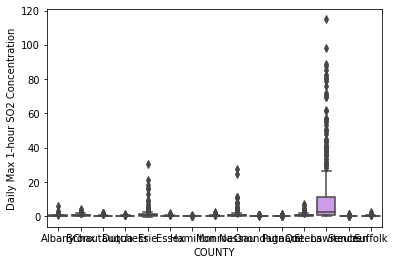

In [29]:
sns.boxplot(x="COUNTY", y="Daily Max 1-hour SO2 Concentration", data=new_combined_so2)

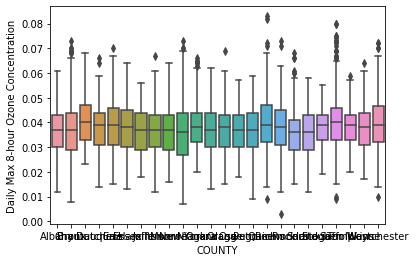

In [30]:
sns.boxplot(x="COUNTY", y="Daily Max 8-hour Ozone Concentration", data=new_combined_ozone)

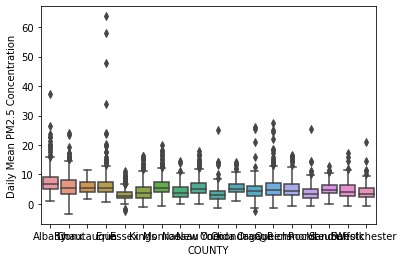

In [31]:
sns.boxplot(x="COUNTY", y="Daily Mean PM2.5 Concentration", data=new_combined_pm2)

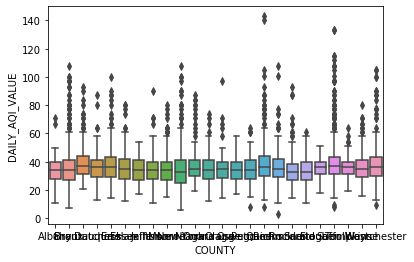

In [32]:
sns.boxplot(x="COUNTY", y="DAILY_AQI_VALUE", data=new_combined_ozone)

In [33]:

# Var_Corr = df.corr()
# # plot the heatmap and annotation on it
# sns.heatmap(Var_Corr, xtick)

In [34]:
new_combined_pm2.corr()

Daily Mean PM2.5 Concentration  \
Daily Mean PM2.5 Concentration                              1.000000   
DAILY_AQI_VALUE                                             0.985169   
DAILY_OBS_COUNT                                                  NaN   
PERCENT_COMPLETE                                                 NaN   
SITE_LATITUDE                                               0.038817   
SITE_LONGITUDE                                             -0.104926   
New Positives                                              -0.109872   
Cumulative Number of Positives                              0.000713   
Total Number of Tests Performed                             0.076609   
Cumulative Number of Tests Performed                        0.100710   

                                      DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Mean PM2.5 Concentration               0.985169              NaN   
DAILY_AQI_VALUE                              1.000000              NaN   
DAILY_OBS_COUNT                                   NaN              NaN   
PERCENT_COMPLETE                                  NaN              NaN   
SITE_LATITUDE                                0.039610              NaN   
SITE_LONGITUDE                              -0.111365              NaN   
New Positives                               -0.117765              NaN   
Cumulative Number of Positives              -0.001123              NaN   
Total Number of Tests Performed              0.078682              NaN   
Cumulative Number of Tests Performed         0.100265              NaN   

                                      PERCENT_COMPLETE  SITE_LATITUDE  \
Daily Mean PM2.5 Concentration                     NaN       0.038817   
DAILY_AQI_VALUE                                    NaN       0.039610   
DAILY_OBS_COUNT                                    NaN            NaN   
PERCENT_COMPLETE                                   NaN            NaN   
SITE_LATITUDE                                      NaN       1.000000   
SITE_LONGITUDE                                     NaN      -0.626725   
New Positives                                      NaN      -0.326725   
Cumulative Number of Positives                     NaN      -0.648975   
Total Number of Tests Performed                    NaN      -0.429578   
Cumulative Number of Tests Performed               NaN      -0.344777   

                                      SITE_LONGITUDE  New Positives  \
Daily Mean PM2.5 Concentration             -0.104926      -0.109872   
DAILY_AQI_VALUE                            -0.111365      -0.117765   
DAILY_OBS_COUNT                                  NaN            NaN   
PERCENT_COMPLETE                                 NaN            NaN   
SITE_LATITUDE                              -0.626725      -0.326725   
SITE_LONGITUDE                              1.000000       0.214891   
New Positives                               0.214891       1.000000   
Cumulative Number of Positives              0.465553       0.169945   
Total Number of Tests Performed             0.229730       0.145351   
Cumulative Number of Tests Performed        0.194240      -0.010641   

                                      Cumulative Number of Positives  \
Daily Mean PM2.5 Concentration                              0.000713   
DAILY_AQI_VALUE                                            -0.001123   
DAILY_OBS_COUNT                                                  NaN   
PERCENT_COMPLETE                                                 NaN   
SITE_LATITUDE                                              -0.648975   
SITE_LONGITUDE                                              0.465553   
New Positives                                               0.169945   
Cumulative Number of Positives                              1.000000   
Total Number of Tests Performed                             0.837487   
Cumulative Number of Tests Performed                        0.768552   

                                      Total Number 

In [35]:
# print(new_combined_pm2.columns[new_combined_pm2.isna().any()].tolist())
# print(len(new_combined_pm2))
# new_combined_pm2 = new_combined_pm2.dropna()
# print(len(new_combined_pm2))
new_combined_ozone =new_combined_ozone.drop(columns=['CBSA_NAME'])
new_combined_ozone.columns

Index(['Date', 'Daily Max 8-hour Ozone Concentration', 'DAILY_AQI_VALUE',
       'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE', 'COUNTY',
       'SITE_LATITUDE', 'SITE_LONGITUDE', 'Test Date', 'County',
       'New Positives', 'Cumulative Number of Positives',
       'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [36]:
# print(new_combined_ozone.columns[new_combined_ozone.isna().any()].tolist())
# print(len(new_combined_ozone))
# new_combined_ozone = new_combined_ozone.dropna()
# print(len(new_combined_ozone))
new_combined_pm2 =new_combined_pm2.drop(columns=['CBSA_NAME'])
# new_combined_pm2.columns

In [37]:
# print(new_combined_so2.columns[new_combined_so2.isna().any()].tolist())
# print(len(new_combined_so2))
# new_combined_so2 = new_combined_so2.dropna()
# print(len(new_combined_so2))
new_combined_so2 = new_combined_so2.drop(columns=['CBSA_NAME'])

In [38]:
# print(new_combined_no2.columns[new_combined_no2.isna().any()].tolist())
# print(len(new_combined_no2))
# new_combined_no2 = new_combined_no2.dropna()
# print(len(new_combined_no2))

In [39]:
# print(new_combined_co.columns[new_combined_co.isna().any()].tolist())
# print(len(new_combined_co))
# new_combined_co = new_combined_co.dropna()
# print(len(new_combined_co))

In [40]:
# new_combined_co.iloc[:, 2]
new_combined_co.columns

Index(['Date', 'Daily Max 8-hour CO Concentration', 'DAILY_AQI_VALUE',
       'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE', 'CBSA_NAME',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'Test Date', 'County',
       'New Positives', 'Cumulative Number of Positives',
       'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [41]:
new_combined_co.iloc[:, [1,2,4,5,12,13,14,15]].corr()

Daily Max 8-hour CO Concentration  \
Daily Max 8-hour CO Concentration                              1.000000   
DAILY_AQI_VALUE                                                0.987308   
DAILY_OBS_COUNT                                                0.035132   
PERCENT_COMPLETE                                               0.035442   
New Positives                                                  0.037902   
Cumulative Number of Positives                                 0.250406   
Total Number of Tests Performed                                0.248212   
Cumulative Number of Tests Performed                           0.257341   

                                      DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Max 8-hour CO Concentration            0.987308         0.035132   
DAILY_AQI_VALUE                              1.000000         0.031004   
DAILY_OBS_COUNT                              0.031004         1.000000   
PERCENT_COMPLETE                             0.031327         0.999986   
New Positives                                0.024406         0.060853   
Cumulative Number of Positives               0.236245        -0.027769   
Total Number of Tests Performed              0.227912        -0.065669   
Cumulative Number of Tests Performed         0.247469        -0.100163   

                                      PERCENT_COMPLETE  New Positives  \
Daily Max 8-hour CO Concentration             0.035442       0.037902   
DAILY_AQI_VALUE                               0.031327       0.024406   
DAILY_OBS_COUNT                               0.999986       0.060853   
PERCENT_COMPLETE                              1.000000       0.060815   
New Positives                                 0.060815       1.000000   
Cumulative Number of Positives               -0.027528       0.139337   
Total Number of Tests Performed              -0.065575       0.020396   
Cumulative Number of Tests Performed         -0.100034      -0.155328   

                                      Cumulative Number of Positives  \
Daily Max 8-hour CO Concentration                           0.250406   
DAILY_AQI_VALUE                                             0.236245   
DAILY_OBS_COUNT                                            -0.027769   
PERCENT_COMPLETE                                           -0.027528   
New Positives                                               0.139337   
Cumulative Number of Positives                              1.000000   
Total Number of Tests Performed                             0.817732   
Cumulative Number of Tests Performed                        0.755958   

                                      Total Number of Tests Performed  \
Daily Max 8-hour CO Concentration                            0.248212   
DAILY_AQI_VALUE                                              0.227912   
DAILY_OBS_COUNT                                             -0.065669   
PERCENT_COMPLETE                                            -0.065575   
New Positives                                                0.020396   
Cumulative Number of Positives                               0.817732   
Total Number of Tests Performed                              1.000000   
Cumulative Number of Tests Performed                         0.868737   

                                      Cumulative Number of Tests Performed  
Daily Max 8-hour CO Concentration                                 0.257341  
DAILY_AQI_VALUE                                                   0.247469  
DAILY_OBS_COUNT                                                  -0.100163  
PERCENT_COMPLETE                                                 -0.100034  
New Positives                                                    -0.155328  
Cumulative Number of Positives                                    0.755958  
Total Number of Tests Performed                                   0.868737  
Cumulative Number of Tests Performed                              1.000000

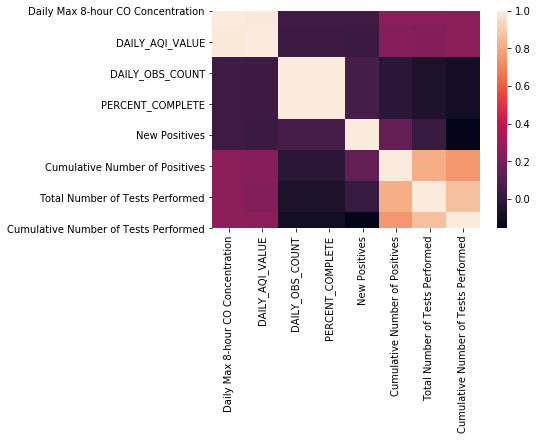

In [42]:
sns.heatmap(new_combined_co.iloc[:, [1,2,4,5,12,13,14,15]].corr())

In [43]:
new_combined_no2.iloc[:, [1,2,4,5,12,13,14,15]].corr()

Daily Max 1-hour NO2 Concentration  \
Daily Max 1-hour NO2 Concentration                              1.000000   
DAILY_AQI_VALUE                                                 0.999052   
DAILY_OBS_COUNT                                                -0.004117   
PERCENT_COMPLETE                                               -0.003013   
New Positives                                                   0.121207   
Cumulative Number of Positives                                  0.196054   
Total Number of Tests Performed                                 0.083374   
Cumulative Number of Tests Performed                            0.069517   

                                      DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Max 1-hour NO2 Concentration           0.999052        -0.004117   
DAILY_AQI_VALUE                              1.000000        -0.004643   
DAILY_OBS_COUNT                             -0.004643         1.000000   
PERCENT_COMPLETE                            -0.003526         0.999885   
New Positives                                0.118598         0.027395   
Cumulative Number of Positives               0.194185         0.036948   
Total Number of Tests Performed              0.081766        -0.007651   
Cumulative Number of Tests Performed         0.068671         0.013948   

                                      PERCENT_COMPLETE  New Positives  \
Daily Max 1-hour NO2 Concentration           -0.003013       0.121207   
DAILY_AQI_VALUE                              -0.003526       0.118598   
DAILY_OBS_COUNT                               0.999885       0.027395   
PERCENT_COMPLETE                              1.000000       0.027970   
New Positives                                 0.027970       1.000000   
Cumulative Number of Positives                0.038515       0.042806   
Total Number of Tests Performed              -0.005827      -0.051653   
Cumulative Number of Tests Performed          0.015148      -0.254974   

                                      Cumulative Number of Positives  \
Daily Max 1-hour NO2 Concentration                          0.196054   
DAILY_AQI_VALUE                                             0.194185   
DAILY_OBS_COUNT                                             0.036948   
PERCENT_COMPLETE                                            0.038515   
New Positives                                               0.042806   
Cumulative Number of Positives                              1.000000   
Total Number of Tests Performed                             0.853673   
Cumulative Number of Tests Performed                        0.756406   

                                      Total Number of Tests Performed  \
Daily Max 1-hour NO2 Concentration                           0.083374   
DAILY_AQI_VALUE                                              0.081766   
DAILY_OBS_COUNT                                             -0.007651   
PERCENT_COMPLETE                                            -0.005827   
New Positives                                               -0.051653   
Cumulative Number of Positives                               0.853673   
Total Number of Tests Performed                              1.000000   
Cumulative Number of Tests Performed                         0.849780   

                                      Cumulative Number of Tests Performed  
Daily Max 1-hour NO2 Concentration                                0.069517  
DAILY_AQI_VALUE                                                   0.068671  
DAILY_OBS_COUNT                                                   0.013948  
PERCENT_COMPLETE                                                  0.015148  
New Positives                                                    -0.254974  
Cumulative Number of Positives                                    0.756406  
Total Number of Tests Performed                                   0.849780  
Cumulative Number of Tests Performed                              1.000000

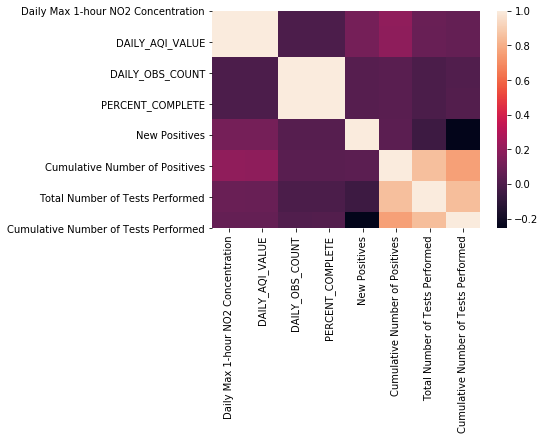

In [44]:
sns.heatmap(new_combined_no2.iloc[:, [1,2,4,5,12,13,14,15]].corr())

In [45]:
new_combined_pm2.iloc[:, [1,2,4,5,11,12,13,14]].corr()
# new_combined_pm2.columns

Daily Mean PM2.5 Concentration  \
Daily Mean PM2.5 Concentration                              1.000000   
DAILY_AQI_VALUE                                             0.985169   
DAILY_OBS_COUNT                                                  NaN   
PERCENT_COMPLETE                                                 NaN   
New Positives                                              -0.109872   
Cumulative Number of Positives                              0.000713   
Total Number of Tests Performed                             0.076609   
Cumulative Number of Tests Performed                        0.100710   

                                      DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Mean PM2.5 Concentration               0.985169              NaN   
DAILY_AQI_VALUE                              1.000000              NaN   
DAILY_OBS_COUNT                                   NaN              NaN   
PERCENT_COMPLETE                                  NaN              NaN   
New Positives                               -0.117765              NaN   
Cumulative Number of Positives              -0.001123              NaN   
Total Number of Tests Performed              0.078682              NaN   
Cumulative Number of Tests Performed         0.100265              NaN   

                                      PERCENT_COMPLETE  New Positives  \
Daily Mean PM2.5 Concentration                     NaN      -0.109872   
DAILY_AQI_VALUE                                    NaN      -0.117765   
DAILY_OBS_COUNT                                    NaN            NaN   
PERCENT_COMPLETE                                   NaN            NaN   
New Positives                                      NaN       1.000000   
Cumulative Number of Positives                     NaN       0.169945   
Total Number of Tests Performed                    NaN       0.145351   
Cumulative Number of Tests Performed               NaN      -0.010641   

                                      Cumulative Number of Positives  \
Daily Mean PM2.5 Concentration                              0.000713   
DAILY_AQI_VALUE                                            -0.001123   
DAILY_OBS_COUNT                                                  NaN   
PERCENT_COMPLETE                                                 NaN   
New Positives                                               0.169945   
Cumulative Number of Positives                              1.000000   
Total Number of Tests Performed                             0.837487   
Cumulative Number of Tests Performed                        0.768552   

                                      Total Number of Tests Performed  \
Daily Mean PM2.5 Concentration                               0.076609   
DAILY_AQI_VALUE                                              0.078682   
DAILY_OBS_COUNT                                                   NaN   
PERCENT_COMPLETE                                                  NaN   
New Positives                                                0.145351   
Cumulative Number of Positives                               0.837487   
Total Number of Tests Performed                              1.000000   
Cumulative Number of Tests Performed                         0.902039   

                                      Cumulative Number of Tests Performed  
Daily Mean PM2.5 Concentration                                    0.100710  
DAILY_AQI_VALUE                                                   0.100265  
DAILY_OBS_COUNT                                                        NaN  
PERCENT_COMPLETE                                                       NaN  
New Positives                                                    -0.010641  
Cumulative Number of Positives                                    0.768552  
Total Number of Tests Performed                                   0.902039  
Cumulative Number of Tests Performed                              1.000000

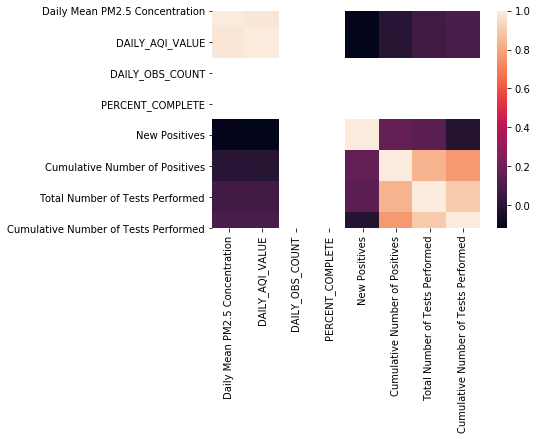

In [46]:
sns.heatmap(new_combined_pm2.iloc[:, [1,2,4,5,11,12,13,14]].corr())

In [47]:
new_combined_ozone.iloc[:, [1,2,4,5,11,12,13,14]].corr()

Daily Max 8-hour Ozone Concentration  \
Daily Max 8-hour Ozone Concentration                              1.000000   
DAILY_AQI_VALUE                                                   0.954331   
DAILY_OBS_COUNT                                                  -0.387209   
PERCENT_COMPLETE                                                  0.073796   
New Positives                                                    -0.025768   
Cumulative Number of Positives                                    0.006465   
Total Number of Tests Performed                                  -0.143010   
Cumulative Number of Tests Performed                             -0.202219   

                                      DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Max 8-hour Ozone Concentration         0.954331        -0.387209   
DAILY_AQI_VALUE                              1.000000        -0.333024   
DAILY_OBS_COUNT                             -0.333024         1.000000   
PERCENT_COMPLETE                             0.069236         0.201142   
New Positives                               -0.030207         0.054771   
Cumulative Number of Positives               0.064064         0.138845   
Total Number of Tests Performed             -0.081325         0.357787   
Cumulative Number of Tests Performed        -0.136548         0.411898   

                                      PERCENT_COMPLETE  New Positives  \
Daily Max 8-hour Ozone Concentration          0.073796      -0.025768   
DAILY_AQI_VALUE                               0.069236      -0.030207   
DAILY_OBS_COUNT                               0.201142       0.054771   
PERCENT_COMPLETE                              1.000000       0.021179   
New Positives                                 0.021179       1.000000   
Cumulative Number of Positives                0.037369       0.315873   
Total Number of Tests Performed               0.012086       0.318046   
Cumulative Number of Tests Performed         -0.004481       0.208151   

                                      Cumulative Number of Positives  \
Daily Max 8-hour Ozone Concentration                        0.006465   
DAILY_AQI_VALUE                                             0.064064   
DAILY_OBS_COUNT                                             0.138845   
PERCENT_COMPLETE                                            0.037369   
New Positives                                               0.315873   
Cumulative Number of Positives                              1.000000   
Total Number of Tests Performed                             0.794822   
Cumulative Number of Tests Performed                        0.795860   

                                      Total Number of Tests Performed  \
Daily Max 8-hour Ozone Concentration                        -0.143010   
DAILY_AQI_VALUE                                             -0.081325   
DAILY_OBS_COUNT                                              0.357787   
PERCENT_COMPLETE                                             0.012086   
New Positives                                                0.318046   
Cumulative Number of Positives                               0.794822   
Total Number of Tests Performed                              1.000000   
Cumulative Number of Tests Performed                         0.920778   

                                      Cumulative Number of Tests Performed  
Daily Max 8-hour Ozone Concentration                             -0.202219  
DAILY_AQI_VALUE                                                  -0.136548  
DAILY_OBS_COUNT                                                   0.411898  
PERCENT_COMPLETE                                                 -0.004481  
New Positives                                                     0.208151  
Cumulative Number of Positives                                    0.795860  
Total Number of Tests Performed                                   0.920778  
Cumulative Number of Tests Performed                              1.000000

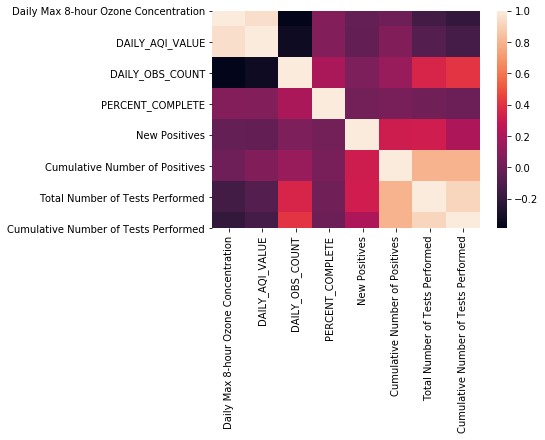

In [48]:
sns.heatmap(new_combined_ozone.iloc[:, [1,2,4,5,11,12,13,14]].corr())

In [49]:
new_combined_co.iloc[:, [1,2,4,5,11,12,13,14]].corr()

Daily Max 8-hour CO Concentration  \
Daily Max 8-hour CO Concentration                           1.000000   
DAILY_AQI_VALUE                                             0.987308   
DAILY_OBS_COUNT                                             0.035132   
PERCENT_COMPLETE                                            0.035442   
New Positives                                               0.037902   
Cumulative Number of Positives                              0.250406   
Total Number of Tests Performed                             0.248212   

                                   DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
Daily Max 8-hour CO Concentration         0.987308         0.035132   
DAILY_AQI_VALUE                           1.000000         0.031004   
DAILY_OBS_COUNT                           0.031004         1.000000   
PERCENT_COMPLETE                          0.031327         0.999986   
New Positives                             0.024406         0.060853   
Cumulative Number of Positives            0.236245        -0.027769   
Total Number of Tests Performed           0.227912        -0.065669   

                                   PERCENT_COMPLETE  New Positives  \
Daily Max 8-hour CO Concentration          0.035442       0.037902   
DAILY_AQI_VALUE                            0.031327       0.024406   
DAILY_OBS_COUNT                            0.999986       0.060853   
PERCENT_COMPLETE                           1.000000       0.060815   
New Positives                              0.060815       1.000000   
Cumulative Number of Positives            -0.027528       0.139337   
Total Number of Tests Performed           -0.065575       0.020396   

                                   Cumulative Number of Positives  \
Daily Max 8-hour CO Concentration                        0.250406   
DAILY_AQI_VALUE                                          0.236245   
DAILY_OBS_COUNT                                         -0.027769   
PERCENT_COMPLETE                                        -0.027528   
New Positives                                            0.139337   
Cumulative Number of Positives                           1.000000   
Total Number of Tests Performed                          0.817732   

                                   Total Number of Tests Performed  
Daily Max 8-hour CO Concentration                         0.248212  
DAILY_AQI_VALUE                                           0.227912  
DAILY_OBS_COUNT                                          -0.065669  
PERCENT_COMPLETE                                         -0.065575  
New Positives                                             0.020396  
Cumulative Number of Positives                            0.817732  
Total Number of Tests Performed                           1.000000

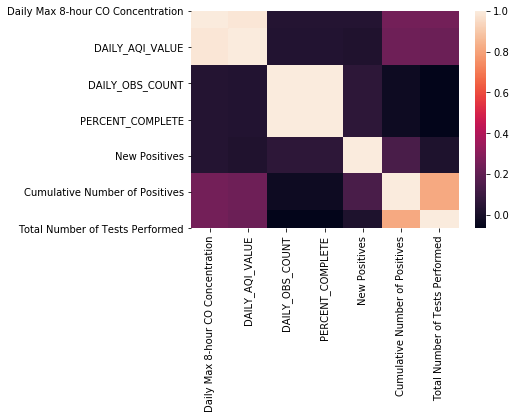

In [50]:
sns.heatmap(new_combined_co.iloc[:, [1,2,4,5,11,12,13,14]].corr())

In [53]:
new_combined_co.to_csv("./data/new_combined_co.csv")
new_combined_no2.to_csv("./data/new_combined_no2.csv")
new_combined_ozone.to_csv("./data/new_combined_ozone.csv")
new_combined_pm2.to_csv("./data/new_combined_pm2.csv")
new_combined_so2.to_csv("./data/new_combined_so2.csv")
